In [90]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [91]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [92]:
len(X_train)

60000

In [93]:
len(X_test)

10000

In [94]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [95]:
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)

In [96]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

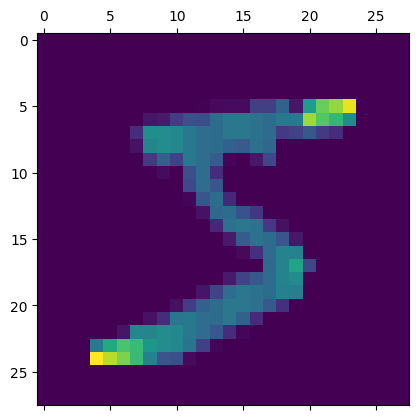

In [97]:
plt.matshow(X_train[0])

In [98]:
y_train[0]

5

In [99]:
X_train.shape

(60000, 28, 28)

In [100]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)

X_test_flatten = X_test.reshape(len(X_test), 28*28)


In [101]:
# model = keras.Sequential([
#     keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.fit(X_train_flatten, y_train, epochs=5)

In [102]:
# model = keras.Sequential([
#     keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
#     keras.layers.Dense(10, activation = 'sigmoid')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.fit(X_train_flatten, y_train, epochs=5)

In [103]:
# model = keras.Sequential([
#     keras.layers.Dense(784, input_shape = (784,), activation = 'relu'),
#     keras.layers.Dense(10, activation = 'sigmoid')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.fit(X_train_flatten, y_train, epochs=5)

In [104]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3339 - accuracy: 0.9077
Epoch 2/5
 670/1875 [=========>....................] - ETA: 4s - loss: 0.1734 - accuracy: 0.9497

KeyboardInterrupt: 

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0839 - accuracy: 0.9745


[0.08388738334178925, 0.9745000004768372]

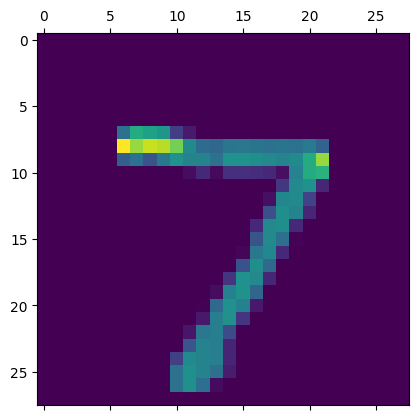

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_predicted[0]

array([2.6005944e-05, 8.4498228e-05, 8.3218412e-03, 8.3635879e-01,
       3.2999984e-07, 6.5907201e-04, 1.2876586e-10, 9.9999875e-01,
       8.8082743e-04, 2.2959877e-03], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    1,    0,    0,    1,    0,    3,    1],
       [   0, 1105,    3,    1,    0,    1,    5,    0,   20,    0],
       [   7,    0,  997,   10,    0,    0,    3,    2,   13,    0],
       [   0,    0,    1,  992,    0,    6,    1,    3,    5,    2],
       [   2,    0,    1,    1,  955,    0,    4,    1,    4,   14],
       [   3,    0,    1,    9,    0,  864,    4,    0,    9,    2],
       [   5,    2,    1,    1,    1,    2,  943,    0,    3,    0],
       [   2,    5,   14,    8,    1,    0,    0,  992,    4,    2],
       [   4,    0,    1,    5,    0,    2,    1,    2,  958,    1],
       [   3,    5,    0,   11,    6,    2,    0,    5,   12,  965]])>

Text(95.72222222222221, 0.5, 'truth')

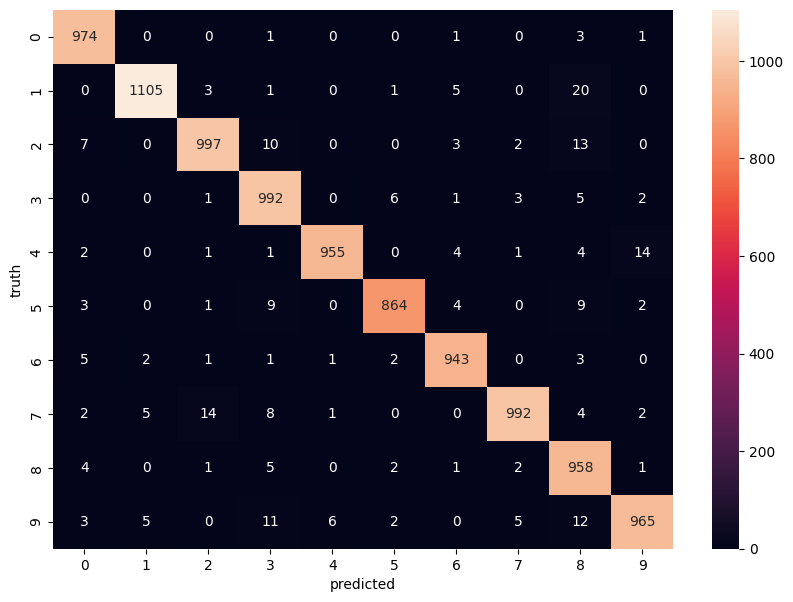

In [ ]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')